In [6]:
import os
import csv
import math
import matplotlib.pyplot as plt

In [2]:
import numpy as np
csv_file = "data_20240902.csv"
cutoff=0
actual_data = np.genfromtxt(csv_file, delimiter=',')[cutoff:]
actual_data2 = np.genfromtxt(csv_file, delimiter=',')[cutoff:]

In [3]:
actual_data = (actual_data - 32768) * 15 / 32768
actual_data_x = actual_data[:, ::2]
actual_data_y = actual_data[:, 1::2]

actual_data2 = (actual_data2 - 32768) * 15 / 32768
actual_data_x2 = actual_data2[:, ::2]
actual_data_y2 = actual_data2[:, 1::2]

print(actual_data_x.shape, actual_data_x[0][0])
print(actual_data_y.shape, actual_data_y[0][0])

print(actual_data_x2.shape, actual_data_x2[0][0])
print(actual_data_y2.shape, actual_data_y2[0][0])


(158, 2621) 0.006866455078125
(158, 2620) 0.011444091796875
(158, 2621) 0.006866455078125
(158, 2620) 0.011444091796875


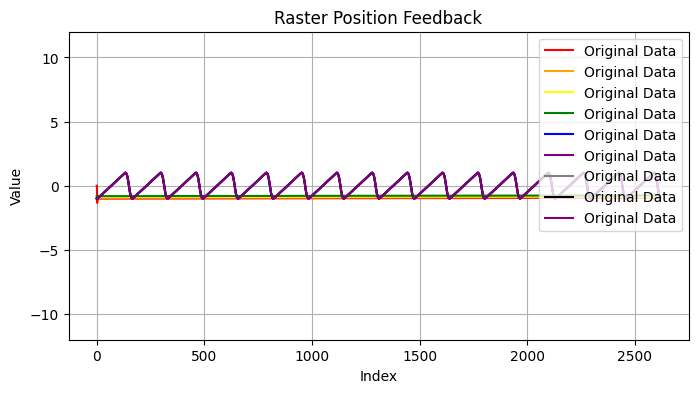

In [5]:
plt.figure(figsize=(8, 4))

start = 0
size = 2620
# Plot the original data
plt.plot(actual_data_x[start][0:size], color='red', label='Original Data')
plt.plot(actual_data_x[start + 1][0:size], color='orange', label='Original Data')
plt.plot(actual_data_x[start + 2][0:size], color='yellow', label='Original Data')
plt.plot(actual_data_x[start + 3][0:size], color='green', label='Original Data')
plt.plot(actual_data_y[start + 4][0:size], color='blue', label='Original Data')
plt.plot(actual_data_y[start + 5][0:size], color='purple', label='Original Data')
plt.plot(actual_data_y[start + 6][0:size], color='grey', label='Original Data')
plt.plot(actual_data_y[start + 7][0:size], color='black', label='Original Data')
plt.plot(actual_data_y[4][0:4704], color='purple', label='Original Data')
plt.ylim(-12, 12)
#plt.plot(actual_data_y[7][0:4704], color='red', label='Buffer')
    
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Raster Position Feedback')
plt.legend()
plt.grid(True)
plt.show()


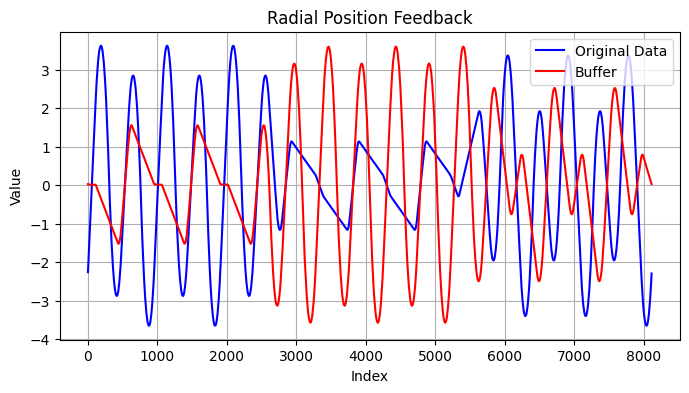

In [13]:
plt.figure(figsize=(8, 4))
    
# Plot the original data
plt.plot(actual_data_x2[10], color='blue', label='Original Data')

plt.plot(actual_data_y2[10], color='red', label='Buffer')
    
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Radial Position Feedback')
plt.legend()
plt.grid(True)
plt.show()

In [9]:

def read_txt(file_path):
    with open(file_path, 'r') as file:
        integers = []
        for line in file:
            clean_line = line.strip()
            first_part = int(clean_line[0:4], 16)
            second_part = int(clean_line[4:8], 16)
            integers.extend([first_part, second_part])
        return np.array(integers)

csv_file = "data_20240902_2.csv"
txt_file = "EnginePattern_raster_amp1_res512_hexadecimal_downsample.txt"
cutoff = 0

digital_actual_data = np.genfromtxt(csv_file, delimiter=',')[cutoff:]
digital_target_data = read_txt(txt_file)

digital_actual_data = (digital_actual_data - 32768) * 15 / 32768
digital_target_data = (digital_target_data - 32768) * 15 / 32768
digital_actual_data = digital_actual_data[:320, :-1]

digital_actual_data_x = digital_actual_data[:, ::2]
digital_actual_data_y = digital_actual_data[:, 1::2]
digital_target_data_x = digital_target_data[::2]
digital_target_data_y = digital_target_data[1::2]

#digital_actual_data_x = digital_actual_data_x.reshape(10, 2620 * 32)
#digital_actual_data_y = digital_actual_data_y.reshape(10, 2620 * 32)

In [13]:
digital_target_data_x = digital_target_data_x.reshape(32, 2620)
digital_target_data_y = digital_target_data_y.reshape(32, 2620)

In [14]:
print(digital_actual_data_x.shape)
print(digital_actual_data_y.shape)
print(digital_target_data_x.shape)
print(digital_target_data_x.shape)

(158, 2620)
(158, 2620)
(32, 2620)
(32, 2620)


In [22]:
print(digital_actual_data_y[20][0])
print(digital_target_data_y[20][0])
print(digital_actual_data_y[52][0])
print(digital_target_data_y[20][0])
print(digital_actual_data_y[84][0])
print(digital_target_data_y[20][0])
print(digital_actual_data_y[116][0])
print(digital_target_data_y[20][0])
print(digital_actual_data_y[148][0])
print(digital_target_data_y[20][0])

-0.977325439453125
-1.000213623046875
-0.974578857421875
-1.000213623046875
-0.999755859375
-1.000213623046875
-1.02264404296875
-1.000213623046875
-1.0455322265625
-1.000213623046875


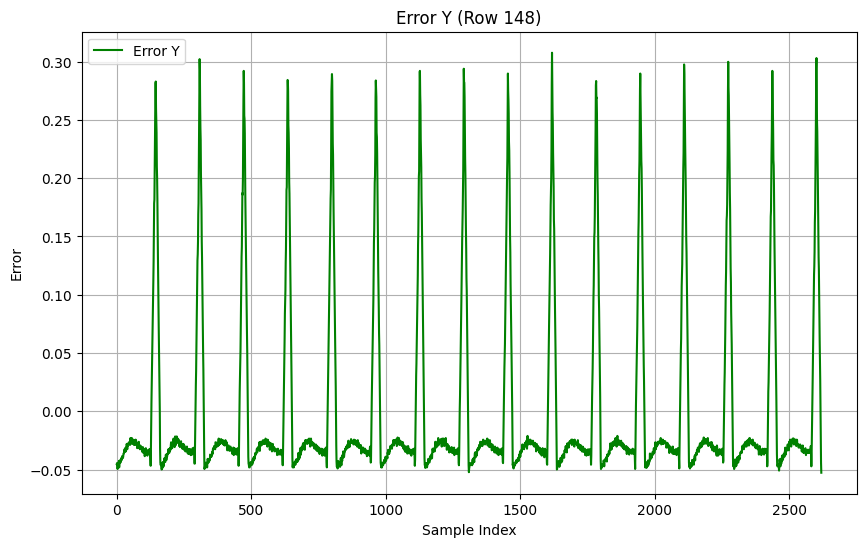

In [29]:
import matplotlib.pyplot as plt
row_index = 148

actual_y = digital_actual_data_y[row_index]
target_y = digital_target_data_y[row_index % digital_target_data_y.shape[0]]

error_y = actual_y - target_y

# Plot the error
plt.figure(figsize=(10, 6))
plt.plot(error_y, label='Error Y', color='green')
plt.title(f'Error Y (Row {row_index})')
plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


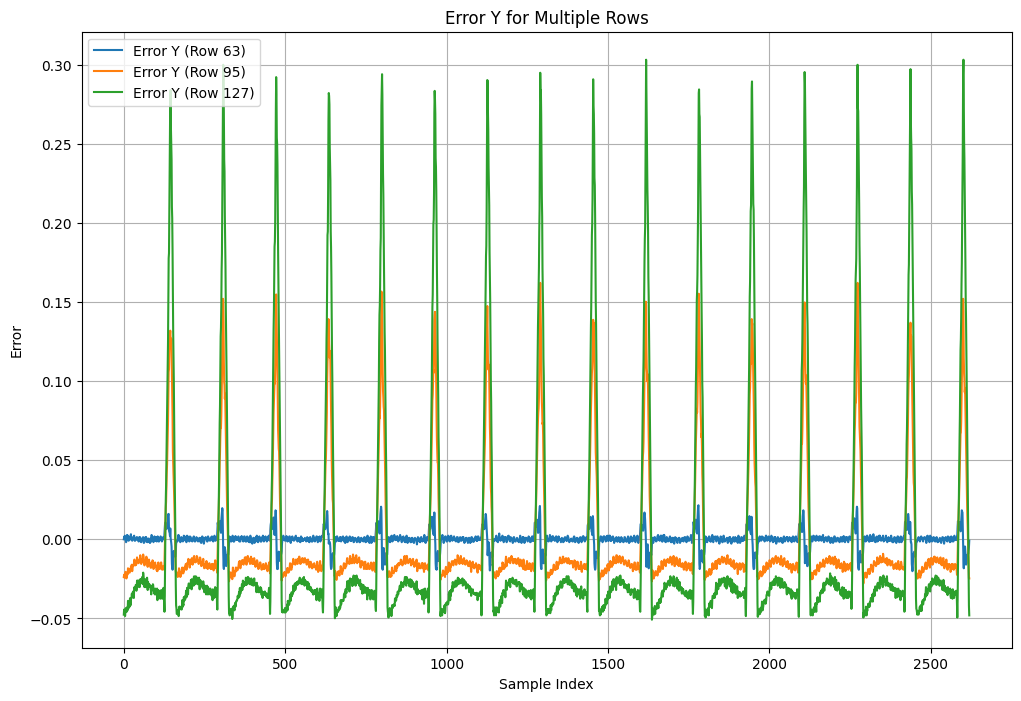

In [41]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
# digital_actual_data_y = np.random.rand(158, 2620)
# digital_target_data_y = np.random.rand(32, 2620)

# Define row indices
row1 = 31
row2 = row1 + 32
row3 = row2 + 32
row4 = row3 + 32
row5 = row4 + 32

row_indices = [row2, row3, row4]

# Create a new figure
plt.figure(figsize=(12, 8))

# Iterate over the specified row indices
for row_index in row_indices:
    # Extract data for the specified row
    actual_y = digital_actual_data_y[row_index]
    target_y = digital_target_data_y[row_index % digital_target_data_y.shape[0]]

    # Calculate the error
    error_y = actual_y - target_y

    # Plot the error
    plt.plot(error_y, label=f'Error Y (Row {row_index})')

# Add plot title and labels
plt.title('Error Y for Multiple Rows')
plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
# Flatten the original array
flattened_data1 = digital_actual_data_y[0:32, :].flatten()
flattened_data2 = digital_actual_data_y[32:64, :].flatten()
flattened_data3 = digital_actual_data_y[64:96, :].flatten()
flattened_data4 = digital_actual_data_y[96:128, :].flatten()

flattened_target = digital_target_data_y.flatten()


In [49]:
error_data1 = flattened_data1 - flattened_target
error_data2 = flattened_data2 - flattened_target
error_data3 = flattened_data3 - flattened_target
error_data4 = flattened_data4 - flattened_target

In [53]:
print(np.mean(np.abs(error_data1)))
print(np.mean(np.abs(error_data2)))

0.0268012712929995
0.025121053666558885


In [54]:
print(np.mean(np.abs(error_data3)))

0.00448240942627419


In [55]:
print(np.mean(np.abs(error_data4)))

0.028405295073531057


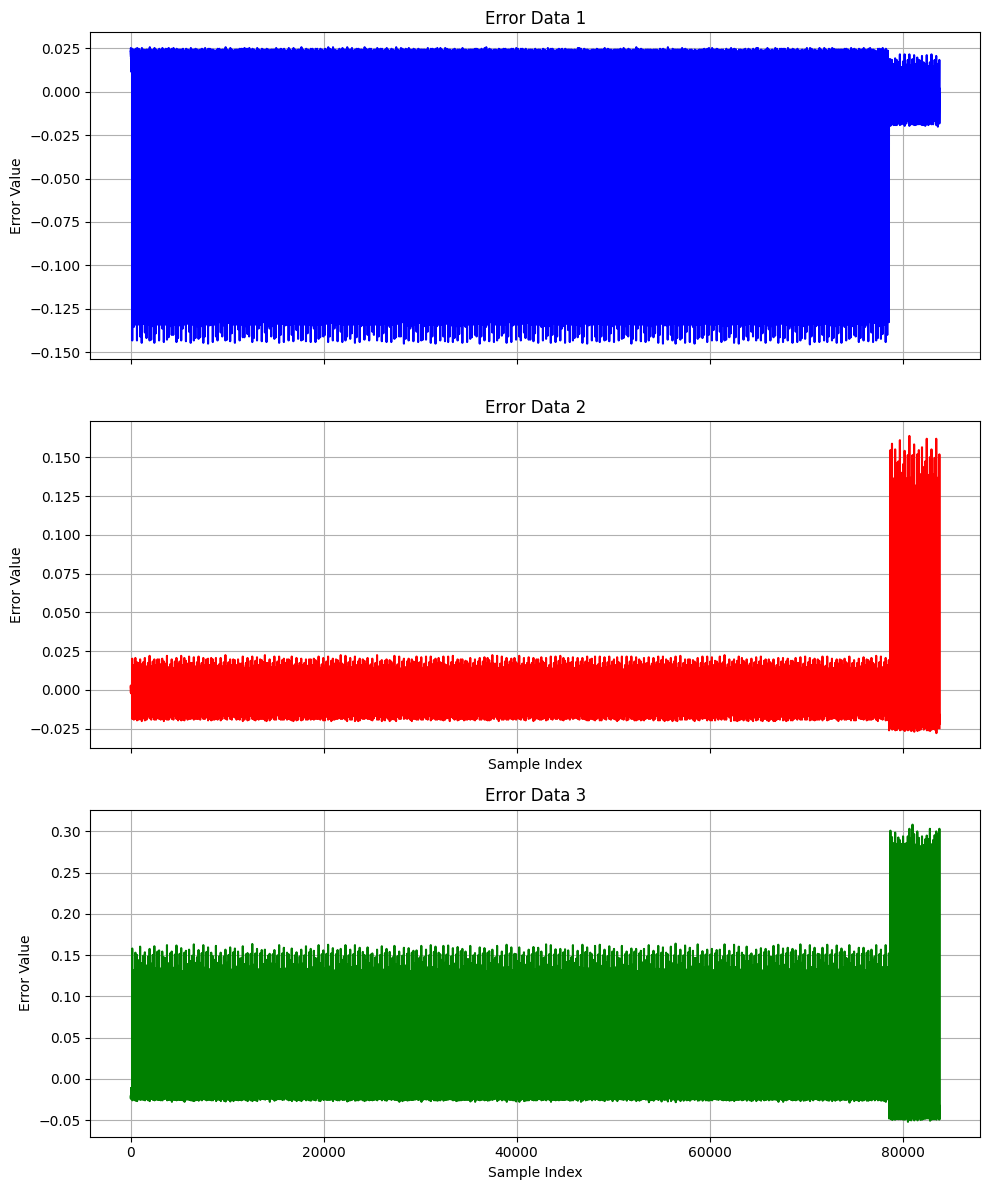

In [63]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot error_data1
axs[0].plot(error_data2, color='blue')
axs[0].set_title('Error Data 1')
axs[0].set_ylabel('Error Value')
axs[0].grid(True)

# Plot error_data2
axs[1].plot(error_data3, color='red')
axs[1].set_title('Error Data 2')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('Error Value')
axs[1].grid(True)

axs[2].plot(error_data4, color='green')
axs[2].set_title('Error Data 3')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('Error Value')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [64]:
# Flatten the original array
flattened_data1 = digital_actual_data_x[0:32, :].flatten()
flattened_data2 = digital_actual_data_x[32:64, :].flatten()
flattened_data3 = digital_actual_data_x[64:96, :].flatten()
flattened_data4 = digital_actual_data_x[96:128, :].flatten()

flattened_target = digital_target_data_x.flatten()

In [65]:
error_data1 = flattened_data1 - flattened_target
error_data2 = flattened_data2 - flattened_target
error_data3 = flattened_data3 - flattened_target
error_data4 = flattened_data4 - flattened_target

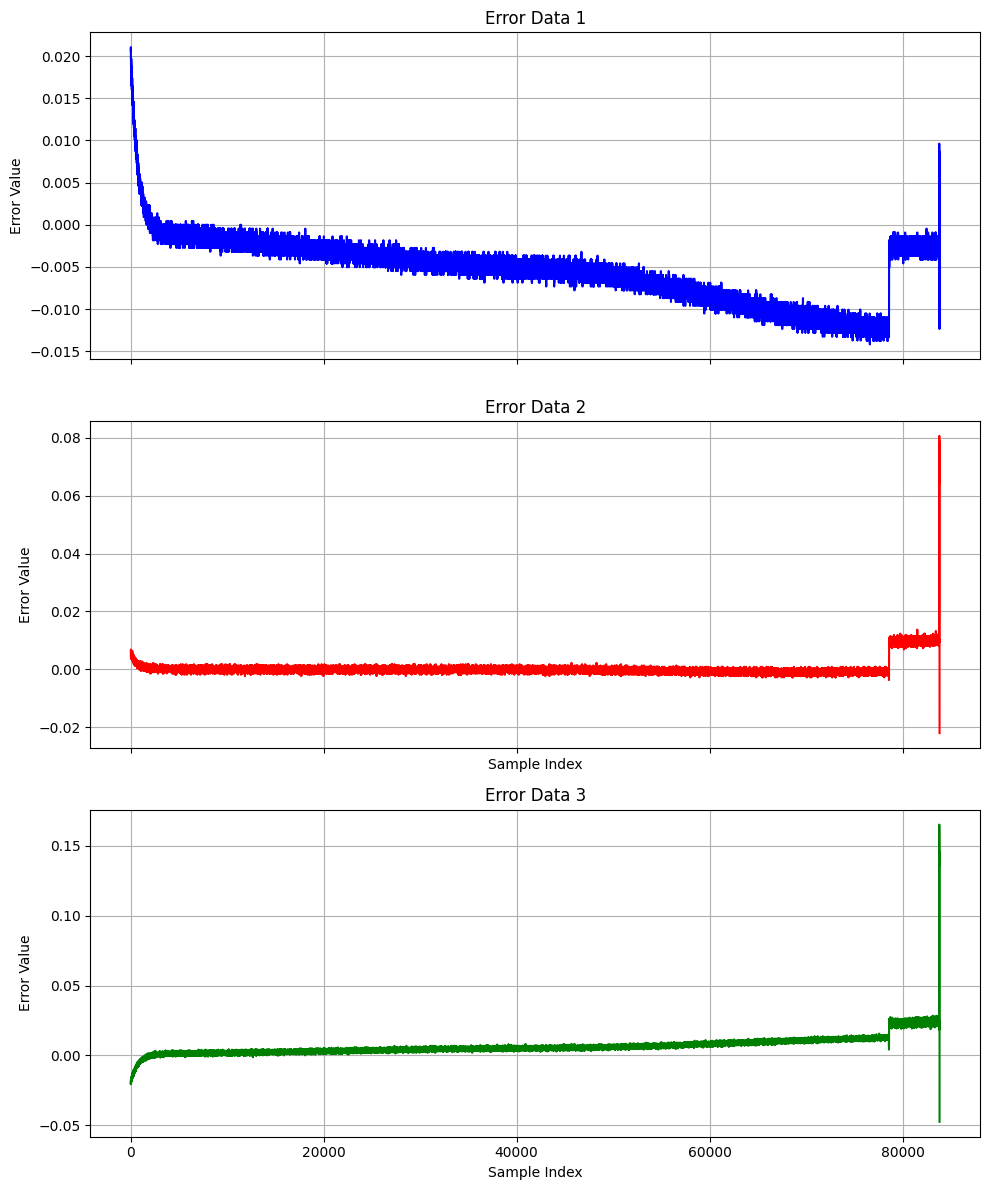

In [66]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot error_data1
axs[0].plot(error_data2, color='blue')
axs[0].set_title('Error Data 1')
axs[0].set_ylabel('Error Value')
axs[0].grid(True)

# Plot error_data2
axs[1].plot(error_data3, color='red')
axs[1].set_title('Error Data 2')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('Error Value')
axs[1].grid(True)

axs[2].plot(error_data4, color='green')
axs[2].set_title('Error Data 3')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('Error Value')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()